,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


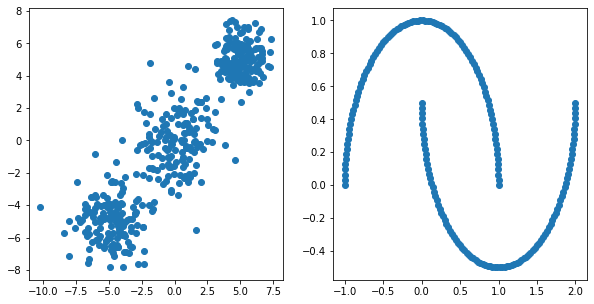

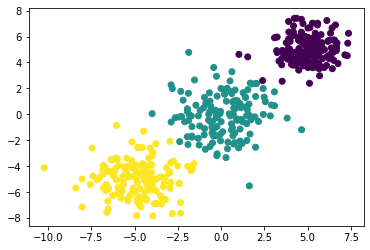

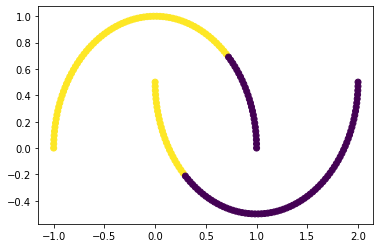

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random
import pandas as pd
%matplotlib inline

#生成数据
cluster_1 = (2**0.5)*np.random.randn(150,2)-[5,5]
cluster_2 = (3**0.5)*np.random.randn(150,2)
cluster_3 = np.random.randn(150,2)+[5,5]      
moon_dataset = datasets.make_moons(200)
moon_dataset_point = moon_dataset[0]

cluster_all = np.concatenate((np.concatenate((cluster_1,cluster_2)),cluster_3))     #将生成的三团正态分布数据整合
np.random.shuffle(cluster_all)       #打乱顺序

def FCM(cluster,c,m,iterator_num,e):    #cluster:数据点   c:类的数量    m:加权指数   iterator_num:迭代次数
    plt.figure()
    iterator = 0
    sample_num = cluster.shape[0]        #样本点的数量
    
    u = np.zeros((c,sample_num))        #初始化隶属度矩阵
    for i in range(sample_num):
        kind_num = random.randint(0,c-1)
        u[kind_num][i]=1
        
        
    v = random.sample(list(cluster),c)      #随机选择c个点作为聚类中心
    
    norm=1000
    while iterator < iterator_num and norm > e: 
        old_u = np.copy(u)
        for j in range(c):                                   #更新聚类中心
            numerator = 0
            denominator = 0
            for k in range(sample_num):
                numerator+=(u[j][k]**m)*cluster[k]
                denominator+=u[j][k]**m
            
            v[j] = numerator/denominator
        

        for k in range(sample_num):                  #更新隶属度矩阵
            for i in range(c):
                denominator = 0
                d_i_k = ((v[i][0]-cluster[k][0])**2+(v[i][1]-cluster[k][1])**2)**0.5
                for j in range(c):
                    d_j_k = ((v[j][0]-cluster[k][0])**2+(v[j][1]-cluster[k][1])**2)**0.5
                    denominator+=(d_i_k/d_j_k)**(2/(m-1))
                u[i][k] = 1/denominator
        
        norm=0                              #求更新后的隶属度矩阵与旧隶属度矩阵之差的二范数
        norm_matrix = u-old_u
        for i in range(c):
            for j in range(sample_num):
                norm+=norm_matrix[i][j]**2
        
        norm = norm**0.5
        
        iterator+=1
    
    #根据隶属度矩阵确定每个点的类别
    kind = []
    
    for k in range(sample_num):
        max_u=-1
        fact_kind=-1
        for i in range(c):
            if u[i][k] > max_u:
                max_u = u[i][k]
                fact_kind=i
        kind.append(fact_kind)
        
    plt.scatter(cluster[:,0],cluster[:,1],c=kind)       #画图布点

iris_data = pd.read_csv('iris.csv')
display(iris_data)


_ , axes = plt.subplots(1,2,figsize=(10,5))
axes[0].scatter(cluster_all[:,0],cluster_all[:,1])
axes[1].scatter(moon_dataset_point[:,0],moon_dataset_point[:,1])

FCM(cluster_all,3,2,300000000,0.01)            
FCM(moon_dataset_point,2,2,300000000,0.01)